# Tarea 5: Algoritmos de Clustering

Nombre: josé Luis Cádiz sejas

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import missingno as msno
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering
from itertools import cycle
pd.options.display.max_columns = None
df = pd.read_excel('datos_aceite.xlsx').select_dtypes(exclude=["object","category"]).drop(columns=["Correlativo Muestra"])
df.head()

,Fierro,Cromo,Aluminio,Cobre,Plomo,Nickel,Plata,Estano,Titanio,Vanadio,Cadmio,Manganeso,Sodio,Potasio,Silicio,Zinc,Bario,Boro,Calcio,Molibdeno,Magnesio,Fosforo,v 40,Contenido agua,Índice PQ,Oxidacion,Partículas > 4um,Partículas > 6um,Partículas > 14um
0,3.7,0.1,0.1,1.2,0.6,0.1,0.1,0.5,0.1,0.1,0.1,0.1,0.6,0.1,0.1,9.1,0.1,0.1,0.1,0.1,0.1,0.1,44.45,0,5,2.09,71259,13781,821
1,17.9,0.1,0.1,0.1,0.1,0.1,0.1,0.7,0.1,0.1,0.1,0.1,0.7,0.1,0.1,10.5,0.1,0.1,0.1,0.1,0.1,0.1,44.40,0,20,1.88,183176,37669,1730
2,1.3,0.1,0.1,1.7,1.0,0.1,0.1,0.7,0.1,0.1,0.1,0.2,0.1,0.1,0.1,47.1,0.1,0.1,4.4,0.1,0.1,9.0,43.99,0,5,2.89,16891,4260,166
3,9.5,0.1,0.1,0.1,2.2,0.1,0.1,1.3,0.1,0.1,0.1,0.1,0.5,0.1,0.1,96.0,0.1,0.1,7.0,0.1,0.1,57.9,41.34,0,15,4.44,20908,3624,270
4,9.7,0.1,1.3,0.1,0.8,0.1,0.1,0.7,0.1,0.1,0.1,0.1,2.8,0.3,6.1,12.2,0.1,0.1,8.8,0.1,5.6,0.1,44.36,0,10,2.18,22643,2910,76


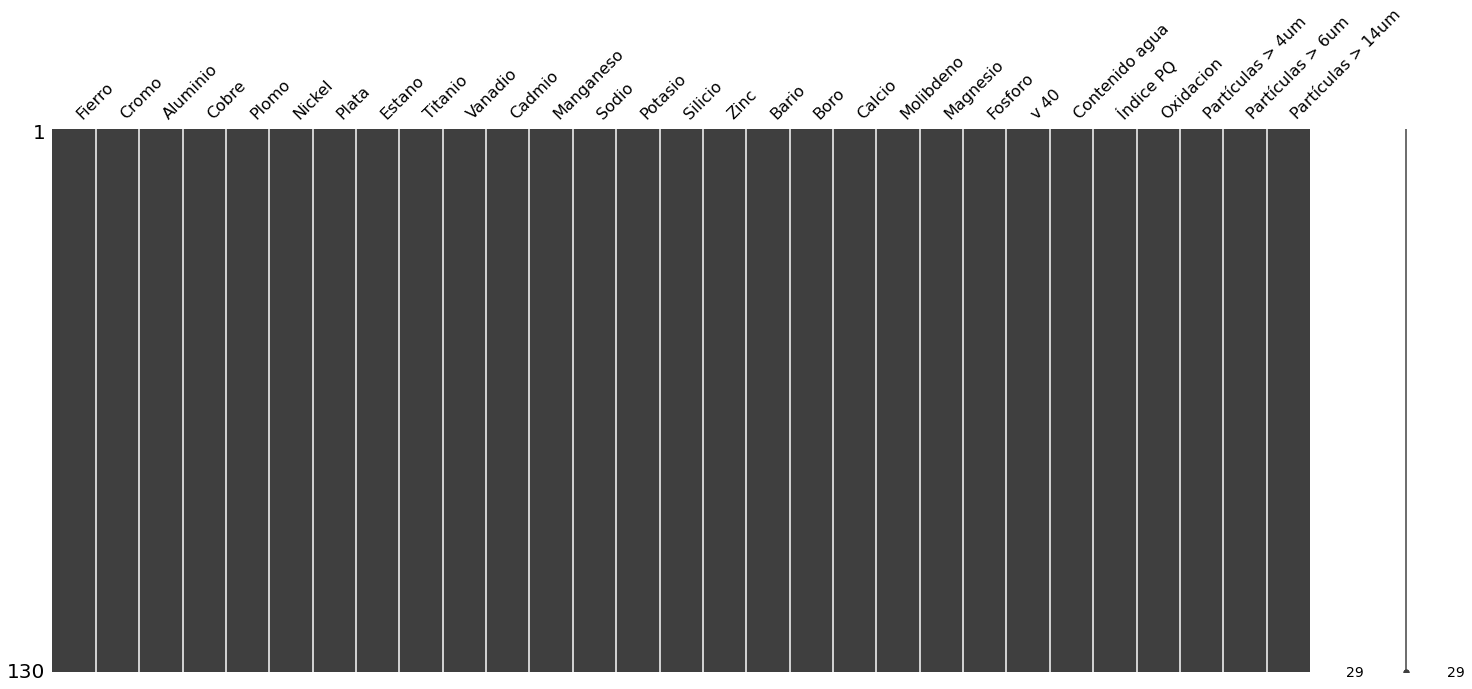

In [90]:
# Analisis de valores faltantes
# Missings
msno.matrix(df)
plt.show()

**No hay valores faltantes.**

# Selección de parámetros

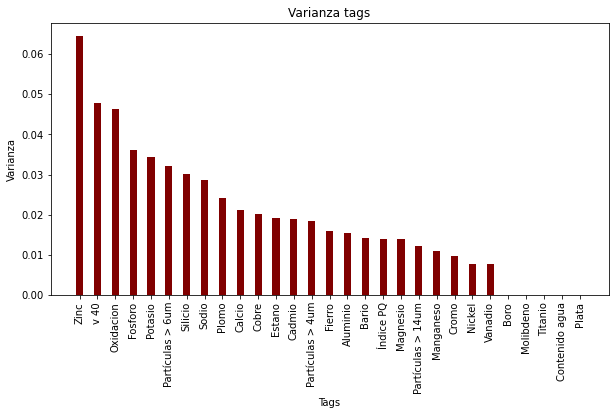

In [91]:
# Análisis de varianza
vars=pd.DataFrame(MinMaxScaler().fit_transform(df),columns=df.columns).var(axis=0).sort_values(ascending=False)
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(vars.index,vars, color ='maroon',width = 0.4,)
plt.xticks(rotation='vertical')
plt.xlabel("Tags")
plt.ylabel("Varianza")
plt.title("Varianza tags")
plt.show()

In [92]:
# Se eliminan los tags de varianza nula
df=df.drop(columns=["Plata","Molibdeno","Contenido agua","Titanio","Boro"])

In [93]:
# Visualización de correlación
df_corr=df.corr()
df_corr


,Fierro,Cromo,Aluminio,Cobre,Plomo,Nickel,Estano,Vanadio,Cadmio,Manganeso,Sodio,Potasio,Silicio,Zinc,Bario,Calcio,Magnesio,Fosforo,v 40,Índice PQ,Oxidacion,Partículas > 4um,Partículas > 6um,Partículas > 14um
Fierro,1.000000,0.822472,0.275718,0.124501,0.012587,0.139262,-0.146066,0.081224,-0.085418,0.767510,0.382603,0.440197,0.573797,0.029298,0.152270,0.074113,-0.014666,-0.028786,-0.175320,0.962663,-0.019234,0.668633,0.492057,0.112336
Cromo,0.822472,1.000000,0.173988,0.096323,-0.047707,0.036059,-0.057852,0.096799,-0.036483,0.815549,0.347686,0.384249,0.525757,0.034231,0.186667,0.039784,0.021557,-0.006116,-0.137827,0.831436,0.000082,0.620183,0.462661,0.114514
Aluminio,0.275718,0.173988,1.000000,0.098960,-0.052394,-0.011468,-0.053734,0.010679,0.038926,0.242250,0.386725,0.500967,0.543175,-0.093444,0.007764,-0.031992,0.237535,-0.088025,-0.102912,0.295275,-0.112320,0.253375,0.219263,0.099381
Cobre,0.124501,0.096323,0.098960,1.000000,0.513922,-0.041285,0.146711,0.096974,0.167913,0.181754,0.223328,0.248279,0.158237,0.230339,-0.039333,0.149865,-0.045725,0.273352,-0.127461,0.121957,0.191613,0.075603,0.049934,0.044746
Plomo,0.012587,-0.047707,-0.052394,0.513922,1.000000,-0.029173,-0.102062,-0.027588,-0.062667,-0.020873,0.014292,-0.015869,0.035390,0.119053,-0.055924,-0.040156,-0.016308,0.010960,-0.047641,-0.018884,0.141056,-0.041116,-0.036120,-0.016549
Nickel,0.139262,0.036059,-0.011468,-0.041285,-0.029173,1.000000,-0.032653,-0.008197,-0.018621,0.028470,-0.047288,-0.006034,-0.008952,-0.045501,-0.003587,-0.041435,-0.009323,-0.035373,-0.074788,0.153812,-0.042572,0.170704,0.110745,-0.005271
Estano,-0.146066,-0.057852,-0.053734,0.146711,-0.102062,-0.032653,1.000000,-0.031311,0.105916,-0.070468,-0.065560,0.005049,-0.042996,0.131909,-0.052803,0.109367,-0.026518,0.252069,0.060496,-0.144886,0.168725,-0.022877,-0.000111,-0.075503
Vanadio,0.081224,0.096799,0.010679,0.096974,-0.027588,-0.008197,-0.031311,1.000000,-0.017609,-0.020097,0.027037,-0.032197,-0.036755,-0.029070,-0.017174,-0.016710,-0.011551,-0.034904,0.010297,0.070125,0.033897,0.015547,0.019832,0.038683
Cadmio,-0.085418,-0.036483,0.038926,0.167913,-0.062667,-0.018621,0.105916,-0.017609,1.000000,-0.045653,0.106949,-0.024997,0.100312,0.245193,-0.039011,0.214294,-0.026240,0.238703,-0.282079,-0.083175,0.155912,-0.111504,-0.108090,-0.065569
Manganeso,0.767510,0.815549,0.242250,0.181754,-0.020873,0.028470,-0.070468,-0.020097,-0.045653,1.000000,0.347660,0.493057,0.480604,0.074591,0.181926,0.059566,0.016796,0.034251,-0.011209,0.768027,0.003934,0.606166,0.424715,0.095703


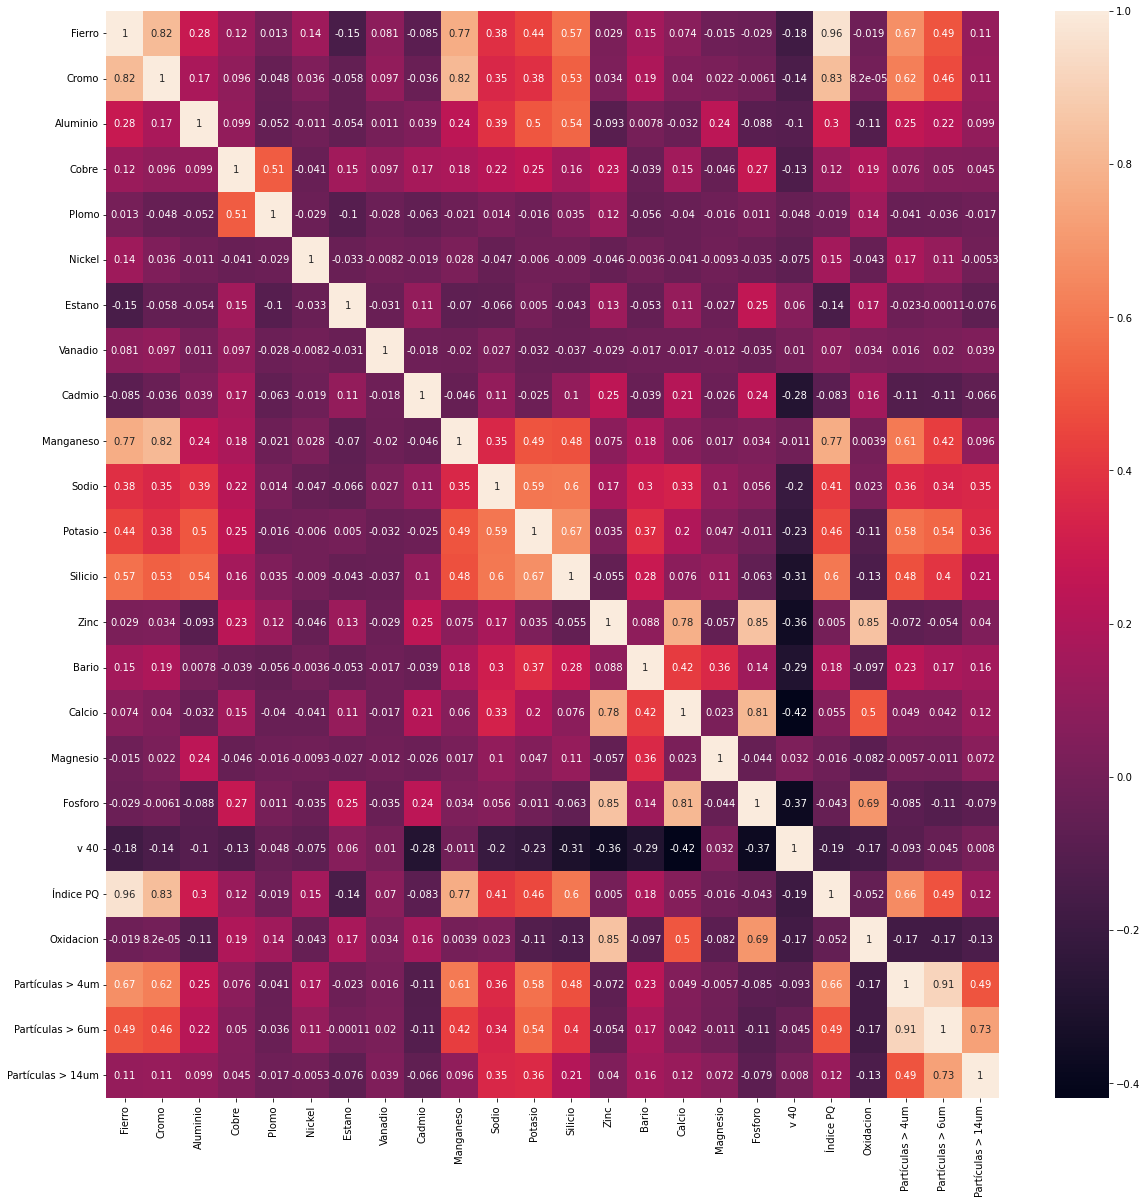

In [94]:
# Visualización
fig = plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot=True)
plt.show()

In [95]:
# Función que filtra tags por alta correlación
def corrkill(dataframe, features, corr_cut=0.7):

    df = dataframe[features]
    dfcorr = pd.DataFrame(np.triu(df.corr()), columns=df.columns, index=df.columns)
    dfcorr = dfcorr.stack().reset_index()
    dfcorr.columns = ['Feat1','Feat2','Val']
    dfcorr = dfcorr[~dfcorr['Val'].isin([0,1])]
    dfcorr = dfcorr[dfcorr['Val'].abs()>corr_cut]
    dfcorr["Val"]=dfcorr["Val"].abs()
    
    return list(dfcorr['Feat2']), dfcorr

In [96]:
# Se obtienen tags altamente correlacionados y matriz que permite visualizar cuales son los par de tags altamente correlacionados
collinearity, table_cor=corrkill(df,df.columns)

In [97]:
# Tags altamente correlacionados
table_cor

,Feat1,Feat2,Val
1,Fierro,Cromo,0.822472
9,Fierro,Manganeso,0.767510
19,Fierro,Índice PQ,0.962663
33,Cromo,Manganeso,0.815549
43,Cromo,Índice PQ,0.831436
235,Manganeso,Índice PQ,0.768027
327,Zinc,Calcio,0.781210
329,Zinc,Fosforo,0.846305
332,Zinc,Oxidacion,0.850236
377,Calcio,Fosforo,0.810839


In [98]:
# Tags elegidos
tag_select = [i for i in df.columns if i not in collinearity]
tag_select

['Fierro',
 'Aluminio',
 'Cobre',
 'Plomo',
 'Nickel',
 'Estano',
 'Vanadio',
 'Cadmio',
 'Sodio',
 'Potasio',
 'Silicio',
 'Zinc',
 'Bario',
 'Magnesio',
 'v 40',
 'Partículas > 4um']

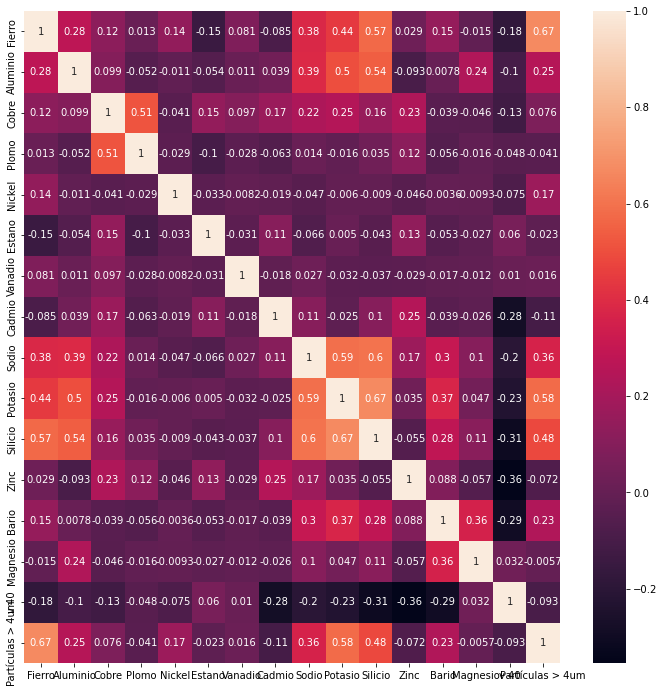

In [99]:
# Visualización corr luego del filtro
fig = plt.figure(figsize=(20,20))
sns.heatmap(df[tag_select].corr(),annot=True)
fig.set_size_inches(12, 12) 

# Estandarización de datos

In [100]:
# Normalización:
minmax = MinMaxScaler()
df_standard=pd.DataFrame(minmax.fit_transform(df),columns=df.columns)
df_standard.head()

,Fierro,Cromo,Aluminio,Cobre,Plomo,Nickel,Estano,Vanadio,Cadmio,Manganeso,Sodio,Potasio,Silicio,Zinc,Bario,Calcio,Magnesio,Fosforo,v 40,Índice PQ,Oxidacion,Partículas > 4um,Partículas > 6um,Partículas > 14um
0,0.013338,0.0,0.000000,0.028721,0.046296,0.0,0.004440,0.0,0.0,0.000000,0.067568,0.000000,0.000000,0.026874,0.0,0.000000,0.000000,0.000000,0.653317,0.019231,0.054500,0.076500,0.092595,0.039910
1,0.065950,0.0,0.000000,0.000000,0.000000,0.0,0.006659,0.0,0.0,0.000000,0.081081,0.000000,0.000000,0.031054,0.0,0.000000,0.000000,0.000000,0.650329,0.076923,0.037159,0.201116,0.258866,0.084314
2,0.004446,0.0,0.000000,0.041775,0.083333,0.0,0.006659,0.0,0.0,0.043478,0.000000,0.000000,0.000000,0.140340,0.0,0.081594,0.000000,0.037888,0.625822,0.019231,0.120562,0.015963,0.026324,0.007914
3,0.034828,0.0,0.000000,0.000000,0.194444,0.0,0.013319,0.0,0.0,0.000000,0.054054,0.000000,0.000000,0.286354,0.0,0.130930,0.000000,0.246062,0.467424,0.057692,0.248555,0.020435,0.021898,0.012994
4,0.035569,0.0,0.545455,0.000000,0.064815,0.0,0.006659,0.0,0.0,0.000000,0.364865,0.222222,0.410959,0.036130,0.0,0.165085,0.901639,0.000000,0.647938,0.038462,0.061932,0.022367,0.016928,0.003517


# Método de reducción de parámetros

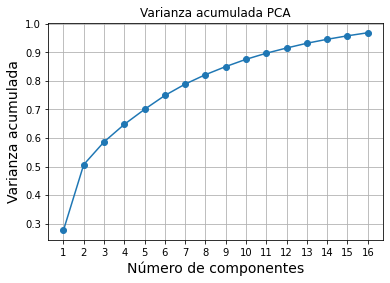

In [101]:
#Determinar el número de componentes con PCA
pca = PCA(n_components=16)
pca.fit(df_standard)
varianza=pca.explained_variance_ratio_.cumsum()

plt.figure()
plt.plot(np.arange(1,17),varianza,'-o')
plt.xlabel('Número de componentes', fontsize=14)
plt.ylabel('Varianza acumulada', fontsize=14)
plt.title("Varianza acumulada PCA")
plt.xticks(np.arange(1,17))
plt.grid()  

In [102]:
# df PCA
pca=PCA(n_components=3)
df_PCA=pca.fit_transform(df_standard)

# Implementación de algoritmos de Clustering

**K-means:**

,silueta,calinski
2,0.609763,83.760741
3,0.598934,105.550270
4,0.578713,111.999042
5,0.573142,108.943895
6,0.516427,109.590294


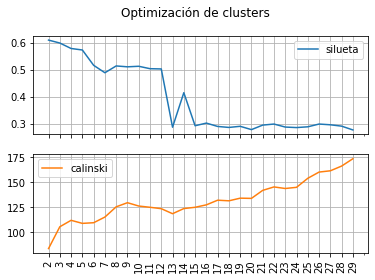

In [103]:
# selección de # de Clusters
list_clusters = [
     KMeans(n_clusters=i, random_state=0).fit_predict(df_PCA)
    for i in range(2, 30)]
list_silueta=[metrics.silhouette_score(df_PCA,Yp) for Yp in list_clusters]
list_calinski=[metrics.calinski_harabasz_score(df_PCA,Yp) for Yp in list_clusters]
# Metricas para distintos números de clusters
metricas= pd.DataFrame({"silueta":list_silueta, "calinski":list_calinski})
metricas.index+=2
display(metricas.head())
# Plot metricas
metricas.plot(grid=True,subplots=True,title='Optimización de clusters')
plt.xticks(metricas.index,rotation=90)
plt.ylabel("")
plt.show()

**A partir de la visualización, tratando de máximizar ambas métricas, se eligen 4 clusters.**

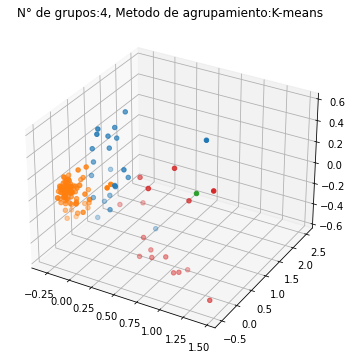

Metodo:  K-means , Silueta:  0.58
Metodo:  K-means , Calinski:  112.00


In [104]:
#Metodo de agrupamiento

Model=KMeans(n_clusters=4)
nombre_mod='K-means'

Yp=Model.fit_predict(df_PCA)
labels_unique = np.unique(Yp)
n_clusters_ = len(labels_unique)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = Yp == k
    ax.scatter(df_PCA[my_members, 0], df_PCA[my_members, 1], df_PCA[my_members, 2], col + '.')
plt.title('N° de grupos:' + str(n_clusters_) + ', Metodo de agrupamiento:' + nombre_mod)
plt.show()

silueta=metrics.silhouette_score(df_PCA,Yp)
calinski=metrics.calinski_harabasz_score(df_PCA,Yp)

print('Metodo: ', nombre_mod, ', Silueta: ', '{:.2f}'.format(silueta))
print('Metodo: ', nombre_mod, ', Calinski: ', '{:.2f}'.format(calinski))


**MeanShift:**

,silueta,calinski
bandwith,,
0.020000,0.072717,2224.356660
0.071579,0.117939,126.233648
0.123158,0.273941,131.370091
0.174737,0.431258,97.139829
0.226316,0.456791,92.899152


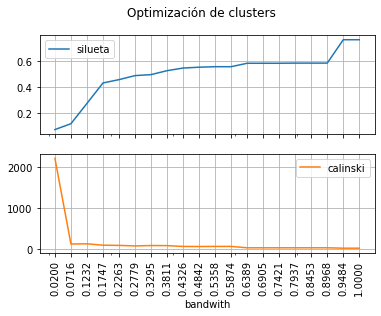

In [105]:
# selección de bandwith
list_clusters = [
     MeanShift(bandwidth=i).fit_predict(df_PCA)
    for i in np.linspace(0.02, 1, num=20)]
list_silueta=[metrics.silhouette_score(df_PCA,Yp) for Yp in list_clusters]
list_calinski=[metrics.calinski_harabasz_score(df_PCA,Yp) for Yp in list_clusters]
# Metricas para distintos números de clusters
metricas= pd.DataFrame({"bandwith":np.linspace(0.02, 1, num=20),"silueta":list_silueta, "calinski":list_calinski}).set_index("bandwith")
display(metricas.head())
# Plot metricas
metricas.plot(grid=True,subplots=True,title='Optimización de clusters')
plt.xticks(metricas.index,rotation=90)
plt.ylabel("")
plt.show()

**A partir de la visualización, tratando de máximizar ambas métricas, se elige bandwidth=0.18.**

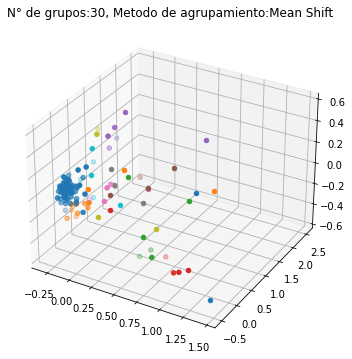

Metodo:  Mean Shift , Silueta:  0.44
Metodo:  Mean Shift , Calinski:  95.83


In [106]:
#Metodo de agrupamiento

Model=MeanShift(bandwidth=0.18)
nombre_mod='Mean Shift'

Yp=Model.fit_predict(df_PCA)
labels_unique = np.unique(Yp)
n_clusters_ = len(labels_unique)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = Yp == k
    ax.scatter(df_PCA[my_members, 0], df_PCA[my_members, 1], df_PCA[my_members, 2], col + '.')
plt.title('N° de grupos:' + str(n_clusters_) + ', Metodo de agrupamiento:' + nombre_mod)
plt.show()

silueta=metrics.silhouette_score(df_PCA,Yp)
calinski=metrics.calinski_harabasz_score(df_PCA,Yp)

print('Metodo: ', nombre_mod, ', Silueta: ', '{:.2f}'.format(silueta))
print('Metodo: ', nombre_mod, ', Calinski: ', '{:.2f}'.format(calinski))


**DBSCAN:**

,silueta,calinski
eps,,
0.020000,0.496399,60.240849
0.071579,0.526796,52.390715
0.123158,0.470144,39.368021
0.174737,0.551807,43.052848
0.226316,0.583804,43.490853


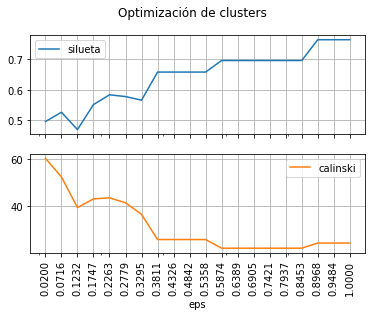

In [107]:
# selección de eps
list_clusters = [
     DBSCAN(eps=i, min_samples=5).fit_predict(df_PCA)
    for i in np.linspace(0.15, 1, num=20)]
list_silueta=[metrics.silhouette_score(df_PCA,Yp) for Yp in list_clusters]
list_calinski=[metrics.calinski_harabasz_score(df_PCA,Yp) for Yp in list_clusters]
# Metricas para distintos números de clusters
metricas= pd.DataFrame({"eps":np.linspace(0.02, 1, num=20),"silueta":list_silueta, "calinski":list_calinski}).set_index("eps")
display(metricas.head())
# Plot metricas
metricas.plot(grid=True,subplots=True,title='Optimización de clusters')
plt.xticks(metricas.index,rotation=90)
plt.ylabel("")
plt.show()

**A partir de la visualización, tratando de máximizar ambas métricas, se elige eps=0.226.**

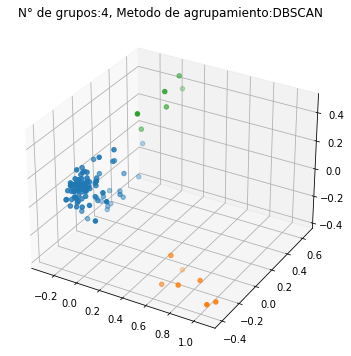

Metodo:  DBSCAN , Silueta:  0.47
Metodo:  DBSCAN , Calinski:  39.96


In [108]:
#Metodo de agrupamiento

Model=DBSCAN(eps=0.226, min_samples=5)
nombre_mod='DBSCAN'

Yp=Model.fit_predict(df_PCA)
labels_unique = np.unique(Yp)
n_clusters_ = len(labels_unique)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = Yp == k
    ax.scatter(df_PCA[my_members, 0], df_PCA[my_members, 1], df_PCA[my_members, 2], col + '.')
plt.title('N° de grupos:' + str(n_clusters_) + ', Metodo de agrupamiento:' + nombre_mod)
plt.show()

silueta=metrics.silhouette_score(df_PCA,Yp)
calinski=metrics.calinski_harabasz_score(df_PCA,Yp)

print('Metodo: ', nombre_mod, ', Silueta: ', '{:.2f}'.format(silueta))
print('Metodo: ', nombre_mod, ', Calinski: ', '{:.2f}'.format(calinski))


**GaussianMixture:**

,silueta,calinski
2,0.471018,51.687981
3,0.368854,62.869726
4,0.352127,42.147392
5,0.371637,44.462244
6,0.403487,69.762944


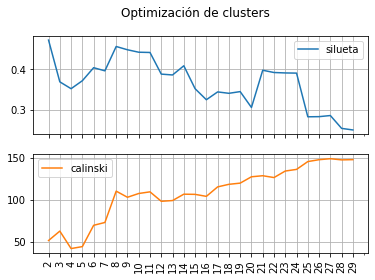

In [109]:
# selección de # de Clusters
list_clusters = [
     mixture.GaussianMixture(n_components=i, random_state=0).fit_predict(df_PCA)
    for i in range(2, 30)]
list_silueta=[metrics.silhouette_score(df_PCA,Yp) for Yp in list_clusters]
list_calinski=[metrics.calinski_harabasz_score(df_PCA,Yp) for Yp in list_clusters]
# Metricas para distintos números de clusters
metricas= pd.DataFrame({"silueta":list_silueta, "calinski":list_calinski})
metricas.index+=2
display(metricas.head())
# Plot metricas
metricas.plot(grid=True,subplots=True,title='Optimización de clusters')
plt.xticks(metricas.index,rotation=90)
plt.ylabel("")
plt.show()

**A partir de la visualización, tratando de máximizar ambas métricas, se eligen 8 clusters.**

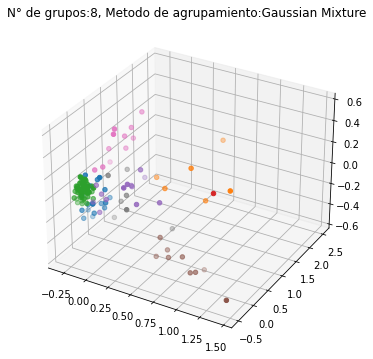

Metodo:  Gaussian Mixture , Silueta:  0.43
Metodo:  Gaussian Mixture , Calinski:  101.91


In [110]:
#Metodo de agrupamiento

Model=mixture.GaussianMixture(n_components=8)
nombre_mod='Gaussian Mixture'

Yp=Model.fit_predict(df_PCA)
labels_unique = np.unique(Yp)
n_clusters_ = len(labels_unique)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = Yp == k
    ax.scatter(df_PCA[my_members, 0], df_PCA[my_members, 1], df_PCA[my_members, 2], col + '.')
plt.title('N° de grupos:' + str(n_clusters_) + ', Metodo de agrupamiento:' + nombre_mod)
plt.show()

silueta=metrics.silhouette_score(df_PCA,Yp)
calinski=metrics.calinski_harabasz_score(df_PCA,Yp)

print('Metodo: ', nombre_mod, ', Silueta: ', '{:.2f}'.format(silueta))
print('Metodo: ', nombre_mod, ', Calinski: ', '{:.2f}'.format(calinski))


**AgglomerativeClustering:**

,silueta,calinski
2,0.613271,82.159312
3,0.573664,95.211831
4,0.555895,96.825115
5,0.560495,93.895692
6,0.470708,95.985660


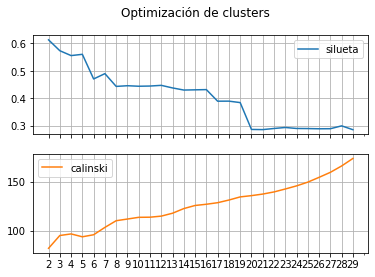

In [111]:
# selección de # de Clusters
list_clusters = [
     AgglomerativeClustering(n_clusters=i).fit_predict(df_PCA)
    for i in range(2, 30)]
list_silueta=[metrics.silhouette_score(df_PCA,Yp) for Yp in list_clusters]
list_calinski=[metrics.calinski_harabasz_score(df_PCA,Yp) for Yp in list_clusters]
# Metricas para distintos números de clusters
metricas= pd.DataFrame({"silueta":list_silueta, "calinski":list_calinski})
metricas.index+=2
display(metricas.head())
# Plot metricas
metricas.plot(grid=True,subplots=True,title='Optimización de clusters')
plt.xticks(metricas.index)
plt.ylabel("")
plt.show()

**A partir de la visualización, tratando de máximizar ambas métricas, se eligen 7 clusters.**

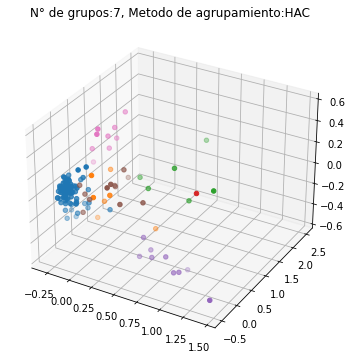

Metodo:  HAC , Silueta:  0.49
Metodo:  HAC , Calinski:  103.49


In [112]:
#Metodo de agrupamiento

Model=AgglomerativeClustering(n_clusters=7)
nombre_mod='HAC'

Yp=Model.fit_predict(df_PCA)
labels_unique = np.unique(Yp)
n_clusters_ = len(labels_unique)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = Yp == k
    ax.scatter(df_PCA[my_members, 0], df_PCA[my_members, 1], df_PCA[my_members, 2], col + '.')
plt.title('N° de grupos:' + str(n_clusters_) + ', Metodo de agrupamiento:' + nombre_mod)
plt.show()

silueta=metrics.silhouette_score(df_PCA,Yp)
calinski=metrics.calinski_harabasz_score(df_PCA,Yp)

print('Metodo: ', nombre_mod, ', Silueta: ', '{:.2f}'.format(silueta))
print('Metodo: ', nombre_mod, ', Calinski: ', '{:.2f}'.format(calinski))


# Conclusiones

**A partir de las métricas calculadas, basandose en particular en la métrica Silueta, se concluye que el mejor algoritmo para los datos analizados fue KMeans(n_clusters=4), el cual además generá  buenos resultados visuales en comparación a los demás algoritmos de clustering.**